## Prepare rules for the all the data sets 
#### 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
#### 2) Change the minimum length in apriori algorithm
#### 3) Visulize the obtained rules using different plots



In [20]:
import pandas as pd
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [21]:
movies = pd.read_csv("C:/Users/sansk/Downloads/my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [22]:
movies.describe

<bound method NDFrame.describe of               V1             V2             V3          V4     V5  \
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2    

In [24]:
df = pd.get_dummies(data=movies)

In [25]:
df.dtypes

Sixth Sense         int64
Gladiator           int64
LOTR1               int64
Harry Potter1       int64
Patriot             int64
LOTR2               int64
Harry Potter2       int64
LOTR                int64
Braveheart          int64
Green Mile          int64
V1_Gladiator        uint8
V1_Harry Potter1    uint8
V1_LOTR1            uint8
V1_Sixth Sense      uint8
V2_Harry Potter2    uint8
V2_LOTR             uint8
V2_LOTR1            uint8
V2_LOTR2            uint8
V2_Patriot          uint8
V3_Braveheart       uint8
V3_Gladiator        uint8
V3_Harry Potter1    uint8
V3_Sixth Sense      uint8
V4_Green Mile       uint8
V5_LOTR2            uint8
dtype: object

In [17]:
movies.shape

(10, 15)

# Apriori Algorithm

In [28]:
item = apriori(df, min_support=0.1, use_colnames=True)
item

C:\Users\sansk\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2..."
1393,0.1,"(LOTR1, V4_Green Mile, V5_LOTR2, V1_Sixth Sens..."
1394,0.1,"(Harry Potter1, V4_Green Mile, V5_LOTR2, V1_Si..."
1395,0.1,"(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2..."


In [33]:
rules = association_rules(item , metric = "lift" , min_threshold= 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64211,(Green Mile),"(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64212,(V3_Harry Potter1),"(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64213,(V2_LOTR1),"(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64214,(LOTR2),"(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


<AxesSubplot:xlabel='confidence', ylabel='support'>

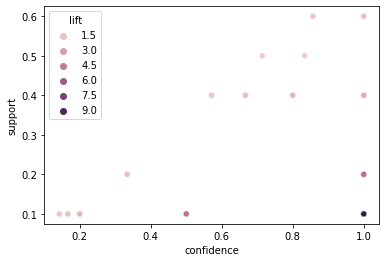

In [34]:
sns.scatterplot(data= rules , x = "confidence" , y = "support" , hue = "lift")

In [35]:
rules_2 = association_rules(item , metric = "confidence" , min_threshold= 0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64211,(Green Mile),"(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64212,(V3_Harry Potter1),"(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64213,(V2_LOTR1),"(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64214,(LOTR2),"(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


<AxesSubplot:xlabel='confidence', ylabel='support'>

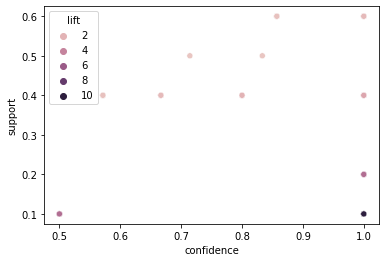

In [36]:
sns.scatterplot(data= rules_2 , x = "confidence", y = "support" , hue = "lift")

In [37]:
rules_3 = association_rules(item , metric = "support" , min_threshold= 0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64211,(Green Mile),"(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64212,(V3_Harry Potter1),"(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64213,(V2_LOTR1),"(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64214,(LOTR2),"(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


<AxesSubplot:xlabel='confidence', ylabel='support'>

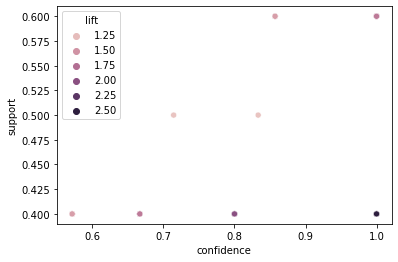

In [38]:
sns.scatterplot(data = rules_3 , x = "confidence" , y = "support" , hue = "lift")